# Comparação estações INMET
Processamento de dados e comparação estatística entre estações

In [1]:
from normaslt import geral
import pandas as pd
import seaborn as sns


In [2]:
estacoes = ['Bauru', 'Rio de Janeiro', 'Teresópolis', 'Juti', 'Bento Gonçalves', 'Belém', 'Cuiabá', 'Manaus']
temp = pd.DataFrame()
lat = []
long = []
for i, estacao in enumerate(estacoes):
  dados, la, lo = geral.readEstacao(estacao, 2015, 2023)
  lat.append(la)
  long.append(lo)
  temp[estacao] = dados['tMed']

In [3]:
temp

,Bauru,Rio de Janeiro,Teresópolis,Juti,Bento Gonçalves,Belém
0,24.9,28.9,18.2,26.7,22.5,23.6
1,25.3,28.2,17.2,26.2,22.6,23.6
2,24.7,29.4,17.7,26.3,22.2,24.0
3,23.8,28.0,18.5,26.4,22.0,24.2
4,23.3,25.9,17.9,26.1,21.5,24.3
...,...,...,...,...,...,...
78883,32.3,24.4,18.0,29.8,21.7,33.2
78884,31.9,23.8,17.9,29.4,22.0,28.1
78885,29.5,23.3,17.6,28.9,21.1,27.9
78886,27.4,23.1,17.0,27.7,19.5,27.8


In [7]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78888 entries, 0 to 78887
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bauru            77010 non-null  float64
 1   Rio de Janeiro   78263 non-null  float64
 2   Teresópolis      77624 non-null  float64
 3   Juti             56433 non-null  float64
 4   Bento Gonçalves  74617 non-null  float64
 5   Belém            77455 non-null  float64
dtypes: float64(6)
memory usage: 3.6 MB


In [5]:
dados.describe().round(2)

,precTotal,pMed,pMax,pMin,rad,tMed,tOrv,tMax,tMin,tOrvMax,tOrvMin,umidMax,umidMin,umid,dirVento,ventoRaj,ventoHor,Tempo UTC
count,77452.00,77460.00,77445.00,77445.00,78888.00,77455.00,77369.00,77442.00,77438.00,77347.00,77344.00,77102.00,77194.00,77176.00,75683.00,75669.00,75683.00,78888
mean,0.41,1008.96,1009.25,1008.66,-379.82,26.95,23.25,27.55,26.39,23.73,22.80,84.02,78.72,81.47,129.26,3.61,0.76,2019-07-02 11:30:00
min,0.00,1001.50,1001.60,1001.40,-2777.50,-5.00,6.40,2.00,-5.00,14.50,3.90,7.00,26.00,30.00,1.00,0.00,0.00,2015-01-01 00:00:00
25%,0.00,1007.60,1007.90,1007.30,0.00,24.50,22.60,24.80,24.30,22.90,22.20,76.00,67.00,71.00,73.00,2.00,0.10,2017-04-01 17:45:00
50%,0.00,1009.00,1009.30,1008.60,3.39,25.90,23.30,26.50,25.50,23.70,22.90,88.00,83.00,86.00,105.00,3.60,0.50,2019-07-02 11:30:00
75%,0.00,1010.30,1010.60,1010.00,298.98,29.30,23.90,30.50,28.40,24.40,23.50,93.00,91.00,92.00,146.00,5.10,1.30,2021-10-01 05:15:00
max,81.20,1015.80,1016.00,1015.70,1452.78,37.00,28.20,38.50,35.60,29.00,26.60,100.00,100.00,100.00,360.00,19.60,7.20,2023-12-31 23:00:00
std,2.47,1.92,1.89,1.92,1213.80,2.97,1.06,3.28,2.64,1.14,1.04,11.47,14.53,13.07,89.49,2.13,0.78,NaN


<Axes: title={'center': 'Temperatura média (°C)'}>

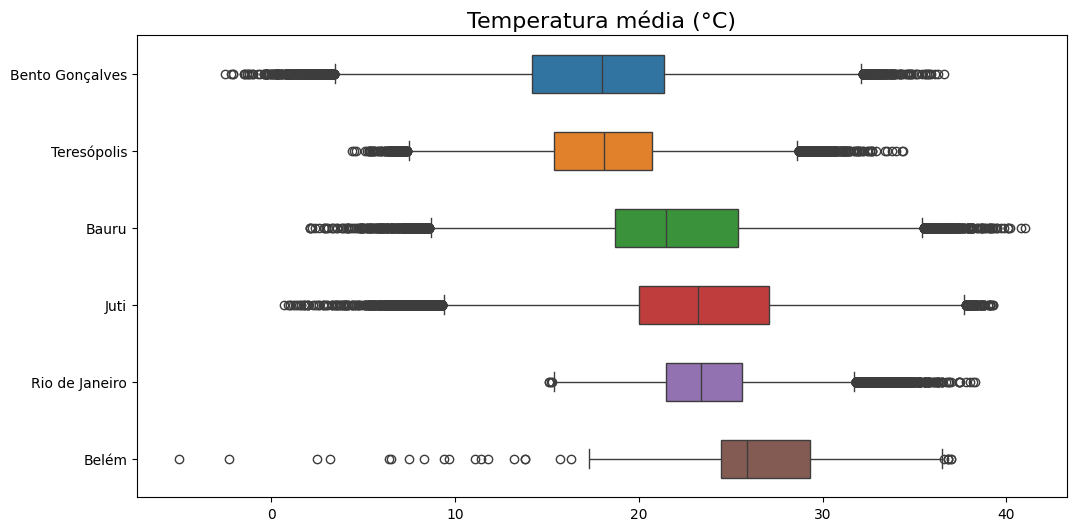

In [9]:
# No boxplot, a plotagem de outliers correspondem a 1.5% da distribuição para cada lado
meds = temp.median()
meds.sort_values(ascending=True, inplace=True)
temp = temp[meds.index]
ax = sns.boxplot(data=temp, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Temperatura média (°C)', fontsize=16)
ax